<a href="https://colab.research.google.com/github/kaiju8/Course-Project1-Disease-Classification/blob/main/Course_Project1_Machine_Learning_Algorithm_for_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset** \
Complete Dataset consists of 2 CSV files attached in the assignment. One of them is training and other is for testing your model. Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis. These symptoms are mapped to 42 diseases you can classify these set of symptoms to. You are required to train your model on training data and test it on testing data. \
**Objectives**
<ol>
<li>Used any four supervised ML models and compare their performances.
<li>Apply dimensional reduction technique (PCA) on data and see how the classification accuracy decreases as the dimension is reduced. Plot a graph between classification accuracy and number of PCA features.
<li>Apply Random Forest algorithm and tune the hyper-parameters for getting the best classification accuracy.

### Importing Data and Preprocessing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train_url = 'https://raw.githubusercontent.com/kaiju8/Course-Project1-Disease-Classification/main/Training.csv'
test_url = 'https://raw.githubusercontent.com/kaiju8/Course-Project1-Disease-Classification/main/Testing.csv'

In [3]:
train_data = pd.read_csv(train_url)
train_data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [4]:
test_data = pd.read_csv(test_url)
test_data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
41,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Fungal infection


In [5]:
train_data['Unnamed: 133'].value_counts()

Series([], Name: Unnamed: 133, dtype: int64)

In [6]:
train_data.drop(['Unnamed: 133'], axis = 1, inplace = True) 

In [7]:
X = train_data.drop('prognosis', axis=1)
y = train_data['prognosis']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_test = test_data.drop('prognosis', axis=1)
y_test = test_data['prognosis'] 

In [8]:
n_classes, n_features = X.shape
n_classes = y.nunique()

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

## Objective 1 & 2
Used any four supervised ML models and compare their performances. \\
Apply dimensional reduction technique (PCA) on data and see how the classification accuracy decreases as the dimension is reduced. Plot a graph between classification accuracy and number of PCA features.

In [10]:
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import copy

from sklearn.metrics import roc_auc_score

In [11]:
def best_model(model, N=n_features):
  accuracies = []

  best_accuracy = 0
  best_component = 1

  for i in range(1, N):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)

    model.fit(X_train_pca,y_train)

    y_train_proba = model.predict_proba(X_train_pca)
    y_val_proba = model.predict_proba(X_val_pca)
    y_test_proba = model.predict_proba(X_test_pca)

    train_accuracy = roc_auc_score(y_train,  y_train_proba, multi_class='ovr')
    val_accuracy = roc_auc_score(y_val,  y_val_proba, multi_class='ovr')
    test_accuracy = roc_auc_score(y_test,  y_test_proba, multi_class='ovr')

    if (i< 15):
      print("Validation Accuracy with", i , " components", model.score(X_val_pca, y_val))
    accuracies.append([i, train_accuracy, val_accuracy, test_accuracy])

    if (val_accuracy > best_accuracy):
      best_model = copy.deepcopy(model)
      best_component = i
      best_accuracy = val_accuracy
    
  df = pd.DataFrame(accuracies, columns=['Number of Components', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy'])
  df.plot(x = 'Number of Components', y = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'], kind = 'line', grid = True, xlabel = 'Number of PCA features', ylabel = 'Accuracy')

  return (best_component, best_model, df)

#### 1. Logistic Regression

Validation Accuracy with 1  components 0.49349593495934957
Validation Accuracy with 2  components 0.8276422764227642
Validation Accuracy with 3  components 0.9479674796747968
Validation Accuracy with 4  components 0.9658536585365853
Validation Accuracy with 5  components 0.9772357723577236
Validation Accuracy with 6  components 0.983739837398374
Validation Accuracy with 7  components 0.9967479674796748
Validation Accuracy with 8  components 1.0
Validation Accuracy with 9  components 1.0
Validation Accuracy with 10  components 1.0
Validation Accuracy with 11  components 1.0
Validation Accuracy with 12  components 1.0
Validation Accuracy with 13  components 1.0
Validation Accuracy with 14  components 1.0


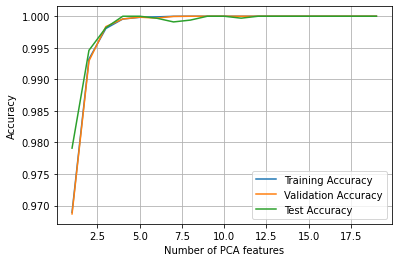

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

k_logreg, best_logreg, logreg_acc = best_model(logreg,20)

#### 2. LDA

Validation Accuracy with 1  components 0.6593495934959349
Validation Accuracy with 2  components 0.8398373983739837
Validation Accuracy with 3  components 0.9284552845528455
Validation Accuracy with 4  components 0.9479674796747968
Validation Accuracy with 5  components 0.959349593495935
Validation Accuracy with 6  components 0.9715447154471545
Validation Accuracy with 7  components 0.9813008130081301
Validation Accuracy with 8  components 0.991869918699187
Validation Accuracy with 9  components 0.9975609756097561
Validation Accuracy with 10  components 0.9975609756097561
Validation Accuracy with 11  components 0.9975609756097561
Validation Accuracy with 12  components 0.9975609756097561
Validation Accuracy with 13  components 0.9975609756097561
Validation Accuracy with 14  components 0.9975609756097561


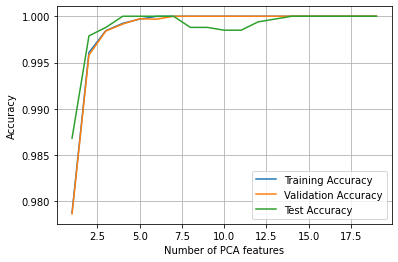

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

k_lda, best_lda, lda_acc = best_model(lda,20)

#### 3. Naive Bayes Classifier

Validation Accuracy with 1  components 0.6097560975609756
Validation Accuracy with 2  components 0.8983739837398373
Validation Accuracy with 3  components 0.943089430894309
Validation Accuracy with 4  components 0.9585365853658536
Validation Accuracy with 5  components 0.973170731707317
Validation Accuracy with 6  components 0.975609756097561
Validation Accuracy with 7  components 0.991869918699187
Validation Accuracy with 8  components 0.9975609756097561
Validation Accuracy with 9  components 0.9991869918699187
Validation Accuracy with 10  components 1.0
Validation Accuracy with 11  components 1.0
Validation Accuracy with 12  components 1.0
Validation Accuracy with 13  components 1.0
Validation Accuracy with 14  components 1.0


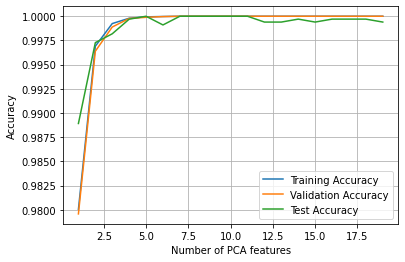

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

k_nb, best_nb, nb_acc = best_model(nb,20)

#### 4. KNN

Validation Accuracy with 1  components 0.8853658536585366
Validation Accuracy with 2  components 1.0
Validation Accuracy with 3  components 1.0
Validation Accuracy with 4  components 1.0
Validation Accuracy with 5  components 1.0
Validation Accuracy with 6  components 1.0
Validation Accuracy with 7  components 1.0
Validation Accuracy with 8  components 1.0
Validation Accuracy with 9  components 1.0
Validation Accuracy with 10  components 1.0
Validation Accuracy with 11  components 1.0
Validation Accuracy with 12  components 1.0
Validation Accuracy with 13  components 1.0
Validation Accuracy with 14  components 1.0


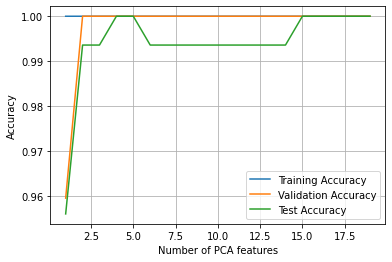

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_knn, best_knn, knn_acc = best_model(knn,20)

#### 5. SVM(Linear)

Validation Accuracy with 1  components 0.532520325203252
Validation Accuracy with 2  components 0.8308943089430895
Validation Accuracy with 3  components 0.9260162601626016
Validation Accuracy with 4  components 0.9520325203252032
Validation Accuracy with 5  components 0.9739837398373984
Validation Accuracy with 6  components 0.991869918699187
Validation Accuracy with 7  components 0.9951219512195122
Validation Accuracy with 8  components 0.9983739837398374
Validation Accuracy with 9  components 1.0
Validation Accuracy with 10  components 1.0
Validation Accuracy with 11  components 1.0
Validation Accuracy with 12  components 1.0
Validation Accuracy with 13  components 1.0
Validation Accuracy with 14  components 1.0


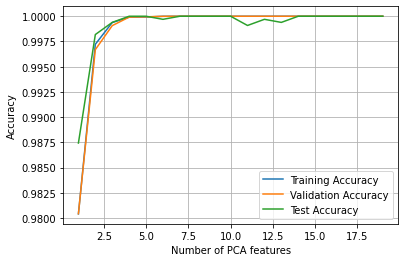

In [16]:
from sklearn.svm import SVC

svcl = SVC(kernel='linear', probability = True)

k_svcl, best_svcl, svcl_acc = best_model(svcl,20)

#### 6. Decision Tree

Validation Accuracy with 1  components 0.9235772357723577
Validation Accuracy with 2  components 0.9926829268292683
Validation Accuracy with 3  components 0.9975609756097561
Validation Accuracy with 4  components 0.9975609756097561
Validation Accuracy with 5  components 0.9772357723577236
Validation Accuracy with 6  components 0.9707317073170731
Validation Accuracy with 7  components 0.9747967479674797
Validation Accuracy with 8  components 0.9764227642276423
Validation Accuracy with 9  components 0.9934959349593496
Validation Accuracy with 10  components 1.0
Validation Accuracy with 11  components 1.0
Validation Accuracy with 12  components 1.0
Validation Accuracy with 13  components 1.0
Validation Accuracy with 14  components 0.9910569105691057


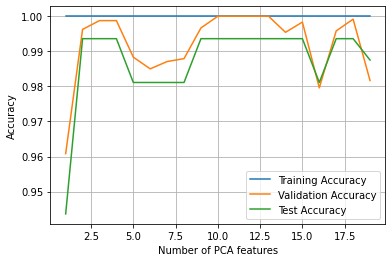

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

k_dt, best_dt, dt_acc = best_model(dt,20)

#### Final Comparison

In [18]:
methods = ["Logistic Reg.", "LDA", "Naive Bayes", "KNN", "SVC", "Dec. Tr."]

train = [logreg_acc.iloc[k_logreg-1][1],
        lda_acc.iloc[k_lda-1][1],
        nb_acc.iloc[k_nb-1][1],
        knn_acc.iloc[k_knn-1][1],
        svcl_acc.iloc[k_svcl-1][1],
        dt_acc.iloc[k_dt-1][1]
]
val = [logreg_acc.iloc[k_logreg-1][2],
        lda_acc.iloc[k_lda-1][2],
        nb_acc.iloc[k_nb-1][2],
        knn_acc.iloc[k_knn-1][2],
        svcl_acc.iloc[k_svcl-1][2],
        dt_acc.iloc[k_dt-1][2]
]
test = [logreg_acc.iloc[k_logreg-1][3],
        lda_acc.iloc[k_lda-1][3],
        nb_acc.iloc[k_nb-1][3],
        knn_acc.iloc[k_knn-1][3],
        svcl_acc.iloc[k_svcl-1][3],
        dt_acc.iloc[k_dt-1][3]
]
comp = [k_logreg,
        k_lda,
        k_nb,
        k_knn,
        k_svcl,
        k_dt
        ]

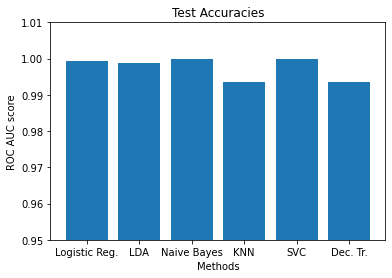

In [19]:
plt.bar(methods, test)

plt.title("Test Accuracies")
     
plt.xlabel("Methods")
plt.ylabel("ROC AUC score")

plt.ylim(0.95, 1.01)
  
plt.show()

In [20]:
print(k_logreg, k_lda, k_nb, k_knn, k_svcl, k_dt)

8 8 7 2 7 10


## Objective 3

Apply Random Forest algorithm and tune the hyper-parameters for getting the best classification accuracy. 

Entire training data set will be used, and Random Search from sklearn.model_selection for hyperparameter tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(max_depth=2, random_state=0)

param = {
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth': [25, 150],
        'max_features': [2, 3, 4, 5],
        'min_samples_leaf': [2, 3, 4, 5],
        'min_samples_split': [2, 3, 4, 5],
        'n_estimators': [500,1000]
}

best_para = RandomizedSearchCV(rfr, param, verbose = 2, n_jobs=-1).fit(X_train, y_train)

rfr_best_model = best_para.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [22]:
y_train_proba = rfr_best_model.predict_proba(X_train)
y_val_proba = rfr_best_model.predict_proba(X_val)
y_test_proba = rfr_best_model.predict_proba(X_test)

rfr_train_accuracy = roc_auc_score(y_train,  y_train_proba, multi_class='ovr')
rfr_val_accuracy = roc_auc_score(y_val,  y_val_proba, multi_class='ovr')
rfr_test_accuracy = roc_auc_score(y_test,  y_test_proba, multi_class='ovr')

methods.append("Rand. For.")
train.append(rfr_train_accuracy)
val.append(rfr_val_accuracy)
test.append(rfr_test_accuracy)

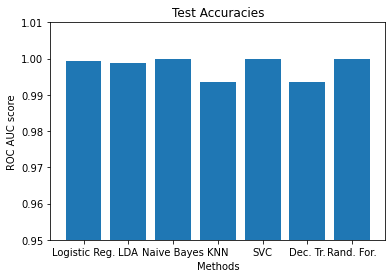

In [23]:
plt.bar(methods, test)

plt.title("Test Accuracies")
     
plt.xlabel("Methods")
plt.ylabel("ROC AUC score")

plt.ylim(0.95, 1.01)
  
plt.show()